In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.shape

(30, 2)

In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
# check if there is any missing date
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
#there are no missing values in the dataset

In [8]:
# reshape data into an array of array so it's suitable for sklearn.LinearRegression


x = data['YearsExperience']
y = data['Salary']
x_matrix = x.values.reshape(-1, 1)
x_matrix

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
y_matrix = y.values.reshape(-1, 1)
y_matrix

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

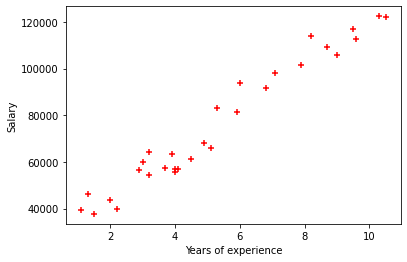

In [10]:
#create scatter plot to show how years of exp affect salary

from matplotlib import pyplot as plt

plt.scatter(x_matrix, y_matrix, color='red', marker='+')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()

In [11]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_matrix, y_matrix, test_size=0.2)
print(f'xtrain: {x_train}')

xtrain: [[ 8.2]
 [ 4.1]
 [ 3.2]
 [ 6. ]
 [ 4.9]
 [ 3.2]
 [10.5]
 [ 1.3]
 [ 7.9]
 [ 4. ]
 [ 3.9]
 [ 3.7]
 [ 1.1]
 [ 3. ]
 [10.3]
 [ 9. ]
 [ 8.7]
 [ 9.5]
 [ 5.1]
 [ 2.9]
 [ 5.9]
 [ 1.5]
 [ 5.3]
 [ 6.8]]


In [12]:
model = LinearRegression()
#training model with train data
model.fit(x_train, y_train)
model.predict(x_test) # predicated values for test data

array([[ 64752.16009152],
       [116603.08020035],
       [ 93455.3480089 ],
       [ 46233.97433836],
       [ 48085.79291368],
       [ 69381.7065298 ]])

In [13]:
# R^2

model.score(x_test, y_test)

0.9416590341010002

In [14]:
#slope value
model.coef_

array([[9259.09287658]])

In [15]:
#intercept value
model.intercept_

array([27715.78858521])

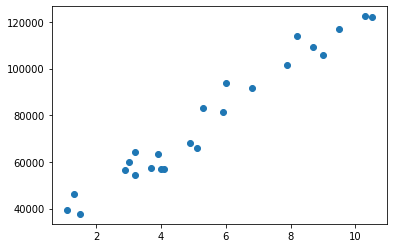

In [16]:
#plot of train data
plt.scatter(x_train, y_train)
plt.show()

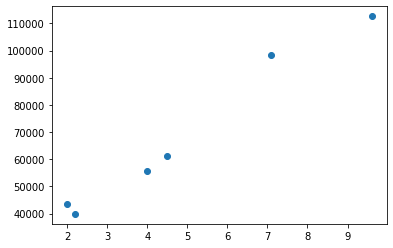

In [17]:
# test data
plt.scatter(x_test, y_test)
plt.show()

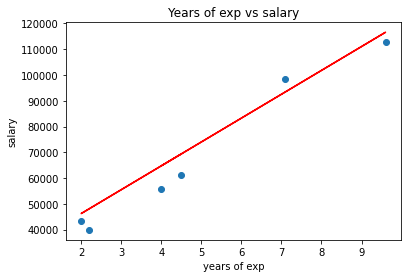

In [18]:
# see how model fits the test data
plt.scatter(x_test, y_test)
plt.plot(x_test, model.predict(x_test), color='red')
plt.xlabel('years of exp')
plt.ylabel('salary')
plt.title('Years of exp vs salary')
plt.show()